
              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


Mar 27 15:45:03 NodeManager::prepare_nodes [Info]: 
    Preparing 184 nodes for simulation.

Mar 27 15:45:03 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 184
    Simulation time (ms): 17988
    Number of OpenMP threads: 1
    Not using MPI

Mar 27 15:45:04 SimulationManager::run [Info]: 
    Simulation finished.


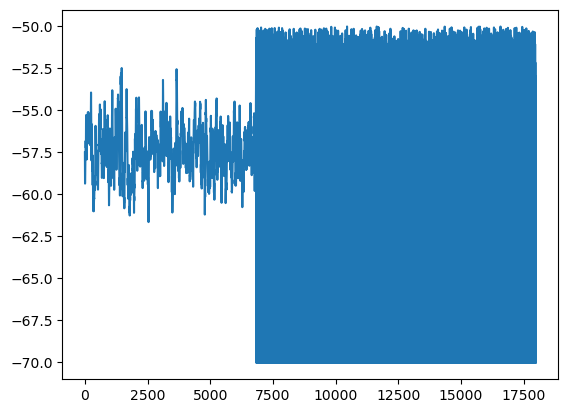

In [1]:
import pandas as pd
import numpy as np
from scripts import neuron_categorization, optimization, model, visualizations, preprocessing
import matplotlib.pyplot as plt

spike_trains = np.load('/hpc/mzhu843/modelling/nest/DATA/processed/spikes/S_3_p.npy')
calcium_traces = np.load('/hpc/mzhu843/modelling/nest/DATA/raw/calcium traces/C_3.npy')
ez_track_data = pd.read_csv('/hpc/mzhu843/modelling/nest/DATA/raw/ezytrack/behaviour_LocationOutput.csv')

categorizer = neuron_categorization.NeuronCategorizer(spike_trains, calcium_traces, ez_track_data)
categorizer.run_categorization()

weights = optimization.initialize_connectivity_matrix_normal_distribution(categorizer.get_categorized_neurons())

model = model.NeuronalNetwork(weights, categorizer.get_categorized_neurons(), G_e=4)

model.simulate()

voltages_trace_pyr = model.voltage_traces_pyr



ts = range(len(voltages_trace_pyr[2]))


plt.plot(ts, voltages_trace_pyr[2])
plt.show()










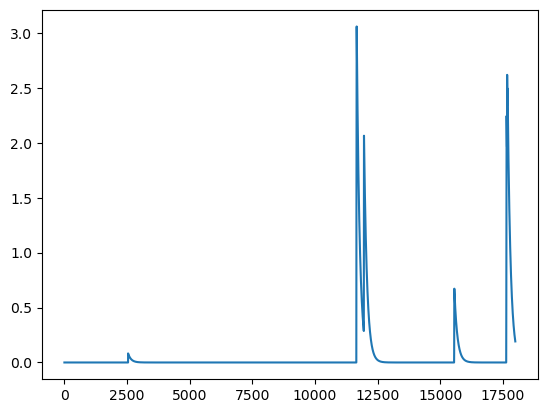

In [2]:
import numpy as np
import matplotlib.pyplot as plt

calcium = np.load('/hpc/mzhu843/modelling/nest/DATA/raw/calcium traces/C_3.npy')
plt.plot(calcium[0])


Mar 27 15:45:05 NodeManager::prepare_nodes [Info]: 
    Preparing 198 nodes for simulation.

Mar 27 15:45:05 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 198
    Simulation time (ms): 2000
    Number of OpenMP threads: 1
    Not using MPI

Mar 27 15:45:05 SimulationManager::run [Info]: 
    Simulation finished.


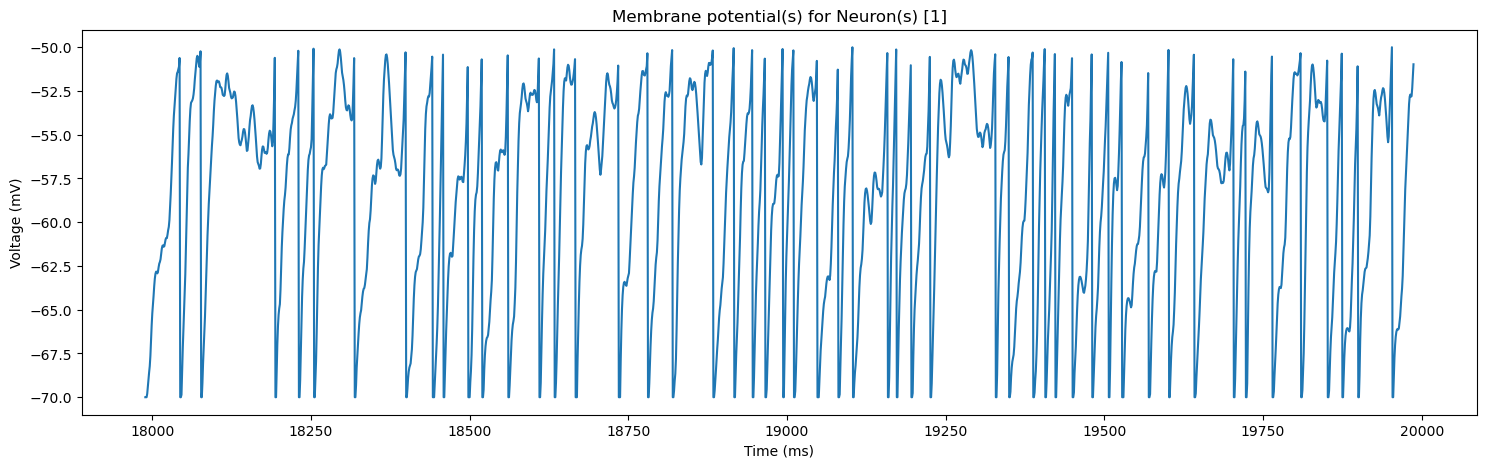

In [3]:
import numpy as np
import nest
import matplotlib.pyplot as plt

from params import pyr_hcamp_deco2012
from scripts import visualizations

pyr = nest.Create('iaf_psc_alpha', n=1, params=pyr_hcamp_deco2012.params)
external_input = nest.Create('poisson_generator', n=10)
external_input.set(rate=40)

external_parrot = nest.Create('parrot_neuron', n=1)


nest.Connect(external_input, external_parrot)
nest.Connect(external_parrot, pyr, syn_spec={'weight': 150})

Vm_recorder = nest.Create('multimeter')
Vm_recorder.set(record_from=['V_m'])
nest.Connect(Vm_recorder, pyr)

spike_recorder = nest.Create('spike_recorder')
nest.Connect(pyr, spike_recorder)

nest.Simulate(2000)

visualizations.plot_vms_from_device(Vm_recorder, [1])



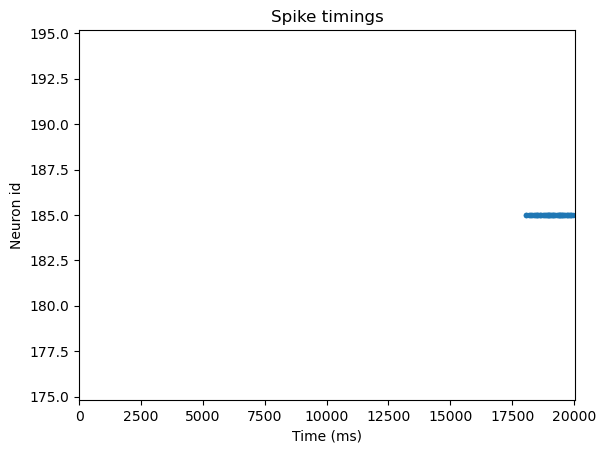

In [4]:
visualizations.plot_spikes_from_device(spike_recorder) 

In [5]:
events = Vm_recorder.get('events')['V_m']
count = 0
for num in events:
    print(num)

-70.0
-70.0
-70.0
-69.80292092403718
-69.3694368149303
-68.93198151099638
-68.57719072748343
-68.2264434777554
-67.64097361101368
-66.7689506990455
-65.89805453832386
-65.20826152706061
-64.73574101931398
-64.22300103646495
-63.65919524339223
-63.219321188616924
-62.94614984320346
-62.82729268364365
-62.83208816308951
-62.92479643294102
-62.81166670640706
-62.56483540666666
-62.364581497134196
-62.267502207987434
-62.114969364576
-61.78777404846704
-61.507115044219596
-61.34953603768604
-61.32141164952887
-61.40243499740065
-61.36866237757478
-61.15575885870919
-60.97580802801588
-60.900059459044286
-60.9089161579278
-60.70612715531142
-60.45424433523405
-60.26698737000059
-59.87297165210522
-59.16949667962528
-58.4111638804938
-57.54819964203056
-56.61420456277678
-55.646753670274364
-54.65162052584115
-53.90384391989424
-53.413558906103006
-52.91522919075075
-52.34711534497784
-51.8075364394246
-51.495750074996394
-51.41708064044426
-51.258549370424966
-51.126503077373044
-50.6179930

0.2611757775709591
1.103826383573551


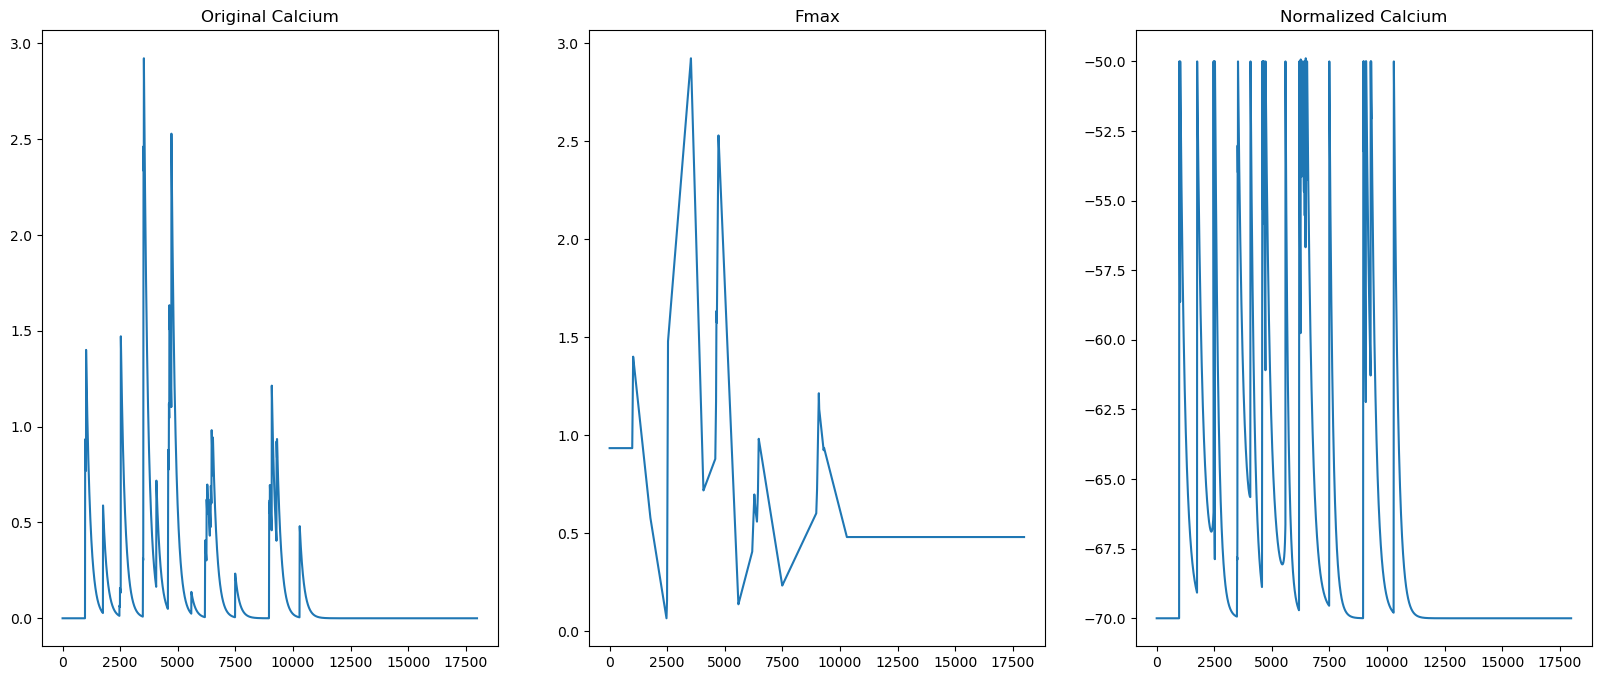

In [6]:
import numpy as np
from scripts import preprocessing
import matplotlib.pyplot as plt

spike_trains = np.load('/hpc/mzhu843/modelling/nest/DATA/processed/spikes/S_3_p.npy')

calcium_traces = np.load('/hpc/mzhu843/modelling/nest/DATA/raw/calcium traces/C_3.npy')

calcium = preprocessing.scale_calcium_data(calcium_traces[1], spike_trains[1], -50, -70)